# Homework 3 Question 4 - Figure 1

Reproduce Figure 1 in the paper.

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec
from matplotlib import pyplot as plt

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [3]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

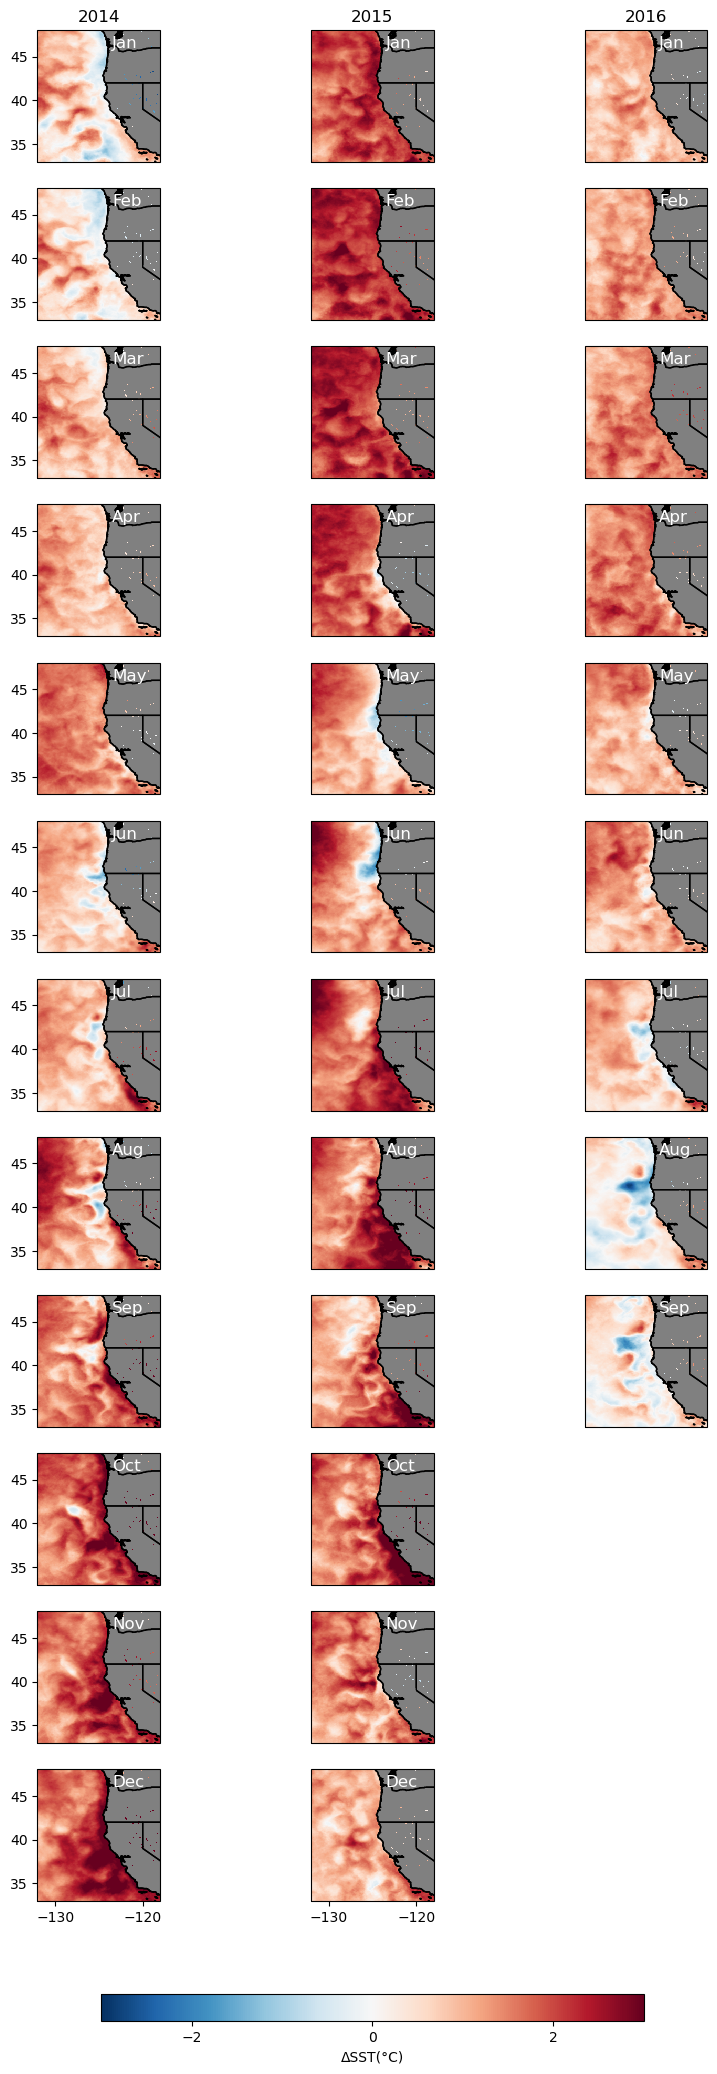

In [7]:
SST = ds.analysed_sst - 273.15
ds_prev = SST.sel(time = slice('2002', '2012'))

ds_prev_mean = ds_prev.groupby(ds_prev.time.dt.month).mean()
#ds_prev_sd = ds_prev.groupby(ds_prev.time.dt.month).std()

ds_2014 = SST.sel(time = slice('2014-01-01', '2014-12-31'))
ds_2015 = SST.sel(time = slice('2015-01-01', '2015-12-31'))
ds_2016 = SST.sel(time = slice('2016-01-01', '2016-12-31'))


ds_2014_mean = ds_2014.groupby(ds_2014.time.dt.month).mean()
ds_2015_mean = ds_2015.groupby(ds_2015.time.dt.month).mean()
ds_2016_mean = ds_2016.groupby(ds_2016.time.dt.month).mean()

anomaly_2014 = ds_2014_mean - ds_prev_mean
anomaly_2015 = ds_2015_mean - ds_prev_mean
anomaly_2016 = ds_2016_mean - ds_prev_mean

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, axs = plt.subplots(nrows = 12, ncols = 3, subplot_kw = dict(projection = crs), figsize = (10, 30))


for i in range(12):
    plot = anomaly_2014.sel(month = i+1).plot(ax = axs[i, 0], transform = crs, add_colorbar = False, vmin = -3, vmax = 3, cmap = "RdBu_r")
    axs[i, 0].coastlines("10m", color = "k")
    axs[i, 0].add_feature(cfeature.LAND, color="grey")
    axs[i, 0].add_feature(cfeature.STATES.with_scale("10m")) 
    axs[i, 0].set_title("")
    axs[i, 0].text(-123.5, 46, month[i], fontsize=12, color = 'white')
    axs[i, 0].set_yticks(range(35, 46, 5))
    axs[i, 0].set_ylabel("")
    if i == 0:
        axs[i, 0].set_title('2014')
    if i == 11:
        axs[i, 0].set_xticks(range(-130, -119, 10))
        axs[i, 0].set_xlabel("")
    
for i in range(12):
    plot = anomaly_2015.sel(month = i+1).plot(ax = axs[i, 1], transform = crs, add_colorbar = False, vmin = -3, vmax = 3, cmap = "RdBu_r")
    axs[i, 1].coastlines("10m", color = "k")
    axs[i, 1].add_feature(cfeature.LAND, color = "grey")
    axs[i, 1].add_feature(cfeature.STATES.with_scale("10m"))
    axs[i, 1].set_title("")
    axs[i, 1].text(-123.5, 46, month[i], fontsize = 12, color = 'white')
    if i == 0:
        axs[i, 1].set_title('2015')
    if i == 11:
        axs[i, 1].set_xticks(range(-130, -119, 10))
        axs[i, 1].set_xlabel("")
    
    
for i in range(9):
    plot = anomaly_2016.sel(month = i+1).plot(ax = axs[i, 2], transform = crs, add_colorbar = False, vmin = -3, vmax = 3, cmap = "RdBu_r")
    axs[i, 2].coastlines("10m", color = "k")
    axs[i, 2].add_feature(cfeature.LAND, color = "grey")
    axs[i, 2].add_feature(cfeature.STATES.with_scale("10m"))
    axs[i, 2].set_title("")
    axs[i, 2].text(-123.5, 46, month[i], fontsize = 12, color = 'white')
    if i == 0:
        axs[i, 2].set_title('2016')
    if i == 11:
        axs[i, 2].set_xticks(range(-130, -119, 10))
        axs[i, 2].set_xlabel("")

fig.delaxes(axs[9, 2])
fig.delaxes(axs[10, 2])
fig.delaxes(axs[11, 2])

#axs[9, 2].tick_params(top='off', bottom='off', left='off', right='off')
# axs[9, 2].spines['top'].set_visible(False)
# axs[9, 2].spines['right'].set_visible(False)
# axs[9, 2].spines['bottom'].set_visible(False)
# axs[9, 2].spines['left'].set_visible(False)
#axs[0, 0].set_ylabel('')
#diff_2014.sel(month = 1).plot.contour(ax=axs[0, 0], colors='black', linewidths=1, cmin=-3, cmax=3)
#diff_2014.plot(transform=crs ,cmap='RdBu_r')

color_bar = plt.colorbar(plot, ax = axs, location = 'bottom', shrink = 0.7, pad = 0.04)
color_bar.set_label('ΔSST(°C)')
color_bar.set_ticks(range(-2,3,2))

In [4]:
# ds2014.groupby(ds2014.time.dt.month).mean().plot()

# ax = plt.subplot(projection=crs)
# ds2014.groupby(ds2014.time.dt.month).mean().plot(ax=ax, transform=crs)
# ax.coastlines("10m", color="k")
# #ax.add_feature(cfeature.LAND, color="grey")
# ax.add_feature(cfeature.STATES.with_scale("10m"))

In [5]:
# dat.groupby(dat.time.dt.month).mean().plot()

# ax = plt.subplot(projection=crs)
# dat.groupby(dat.time.dt.month).mean().plot(ax=ax, transform=crs)
# ax.coastlines("10m", color="k")
# #ax.add_feature(cfeature.LAND, color="grey")
# ax.add_feature(cfeature.STATES.with_scale("10m"))